# Análise exploratória

### Análise focando do sexo dos participantes do ENEM 2022

Importando as bibliotecas necessárias

In [24]:
import pandas as pd
import matplotlib
import plotly.express as px

Lendo o dataset onde contém dos dados do enem 2022

In [25]:
dados = pd.read_csv('datasets/MICRODADOS_ENEM_2022.csv', encoding='ISO-8859-1', sep=';')

Analisando os dados que temos

In [26]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [28]:
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Filtrando as colunas que usaremos para analise

In [29]:
colunas_seleciondas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [30]:
dados_redacao_sexo = dados.filter(items=colunas_seleciondas)

In [31]:
dados_redacao_sexo.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,760.0
3,M,320.0
4,M,NaN


In [32]:
dados_redacao_sexo.dropna()
dados_redacao_sexo.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,760.0
3,M,320.0
4,M,NaN


Analisando a quantidade total de participantes por sexo declarado

In [33]:
dados_redacao_sexo.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,1530098
M,963344


Analisando o percentual de participantes por sexo com grafico do plotly

In [34]:
qtde_sexo = dados_redacao_sexo.groupby('TP_SEXO').count()
qtde_sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,1530098
M,963344


In [35]:
px.pie(qtde_sexo, names=qtde_sexo.index, values=qtde_sexo['NU_NOTA_REDACAO'], color_discrete_sequence=['pink', 'blue'], hole=.6)

Nota máxima por sexo

In [36]:
dados_redacao_sexo.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


Nota miníma por sexo

In [37]:
dados_redacao_sexo.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


Nota minima maior que zero por sexo

In [38]:
dados_redacao_sexo[dados_redacao_sexo.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


Média por sexo

In [39]:
dados_redacao_sexo.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,628.922919
M,601.892533


Mediana por sexo

In [40]:
dados_redacao_sexo.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,640.0
M,600.0


Histograma de notas dos participantes por sexo

TP_SEXO
F    [[Axes(0.125,0.11;0.775x0.77)]]
M    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

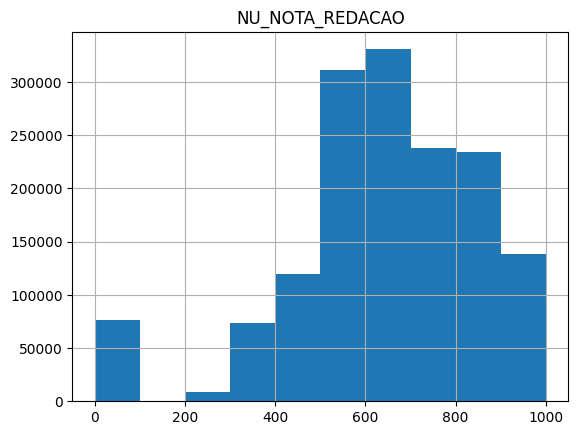

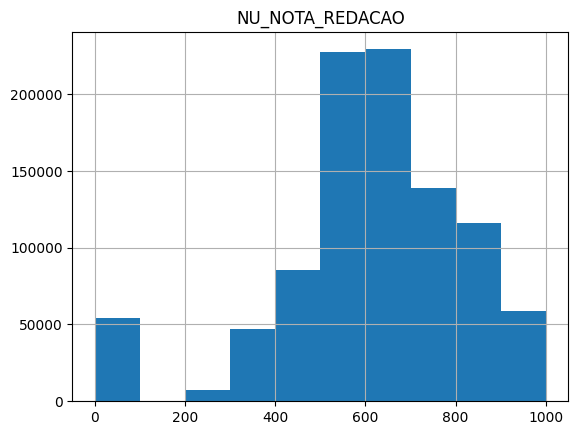

In [41]:
dados_redacao_sexo.groupby('TP_SEXO').hist()

Informações de notas por sexo

In [42]:
dados_redacao_sexo.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1530098.0  628.922919  213.217841  0.0  540.0  640.0  780.0   
M              963344.0  601.892533  209.538737  0.0  520.0  600.0  740.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0